# NUFFT vs. FFT

This is a quick comparision of a Cartesian sampled NUFFT vs. FFT.

In [1]:
import numpy as np
import sigpy as sp
import sigpy.plot as plt
import sigpy.mri as spmri
from PIL import Image

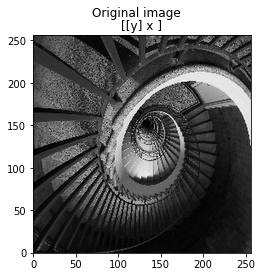

(1+0j)


In [3]:
# load image
image = Image.open('./img/spiral_stairs.jpg').resize([256,256]).convert('L')
image = np.array(image,np.double) * np.exp(1j)
image = image / np.max(image[...])
plt.ImagePlot(image, title='Original image')
print(image.max())

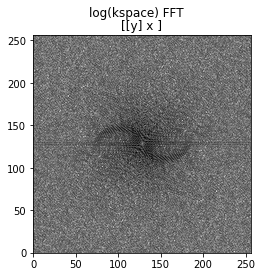

65.16149421751967


In [4]:
kspace_fft = np.fft.ifftshift(np.fft.fft2(image,norm="ortho"))
plt.ImagePlot(np.log(kspace_fft), title='log(kspace) FFT')
print(np.abs(kspace_fft).max())

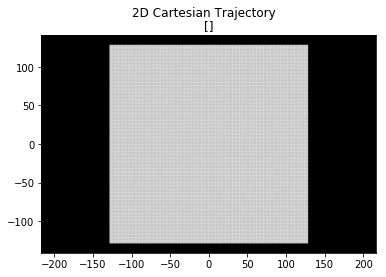

In [5]:
ksiz = 256
xs = np.linspace(-ksiz/2,ksiz/2,ksiz)
ys = xs
xk, yk = np.meshgrid(xs,ys)
traj = np.stack((yk,xk),axis=-1)

plt.ScatterPlot(traj, title='2D Cartesian Trajectory')

Produced k-space: (log to better visualize)


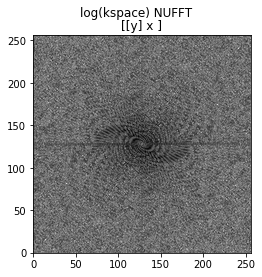

In [6]:
kspace_nufft = sp.nufft(image, traj)
print('Produced k-space: (log to better visualize)' )
plt.ImagePlot(np.log(kspace_nufft), title='log(kspace) NUFFT')

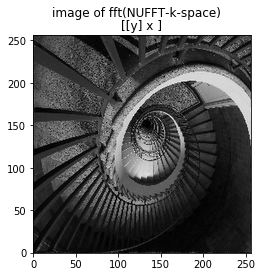

(0.003732788121877627+0.001132328897380453j)


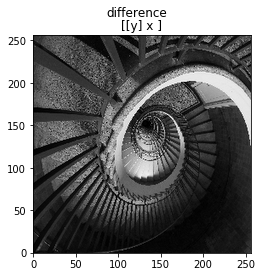

0.9962678553642788


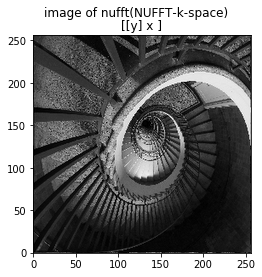

(0.9963940751877162-9.137008434876299e-16j)


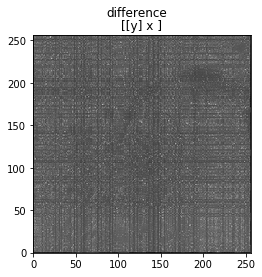

0.8999415234358283


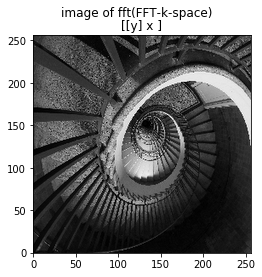

(1.0000000000000002+4.7676146215934665e-17j)


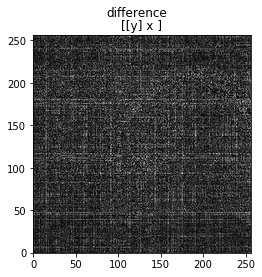

4.625104380423202e-16


In [7]:
image_nufft = np.fft.ifftshift(np.fft.ifft2(kspace_nufft))
plt.ImagePlot(image_nufft, title='image of fft(NUFFT-k-space)')
print(image_nufft.max())

diff_nufft = image - image_nufft
plt.ImagePlot(diff_nufft, title='difference')
print(np.abs(diff_nufft).max())


image_nufft_inufft = sp.nufft_adjoint(kspace_nufft, traj, (256,256))
plt.ImagePlot(image_nufft_inufft, title='image of nufft(NUFFT-k-space)')
print(image_nufft_inufft.max())

diff_nufft_inufft = image - image_nufft_inufft
plt.ImagePlot(np.log(diff_nufft_inufft), title='difference')
print(np.abs(diff_nufft_inufft).max())


image_fft = np.fft.ifft2(np.fft.fftshift(kspace_fft),norm="ortho")
plt.ImagePlot(image_fft, title='image of fft(FFT-k-space)')
print(image_fft.max())

diff_fft = image - image_fft
plt.ImagePlot(diff_fft, title='difference')
print(np.abs(diff_fft).max())

The results above demonstrate that there are some differences in terms of the scaling between the FFT and NUFFT.